# Importing Libraries

In [40]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import datetime
import dateutil.parser
import ipaddress
import statistics
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.impute import SimpleImputer
from datetime import datetime
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib.colors import LogNorm

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preprocessing Data

### Demo: DataFrame Features

In [41]:
demo_df=pd.read_csv('drive/MyDrive/first_add_features_df.csv')
demo_df = demo_df.drop(columns = ["Latitude", "Longitude", "Address", "ADID", "Device ID", "Full","Column3",'Browser Family', 'OS Family', 'Device Family'])
demo_df.head(2)

<ipython-input-41-af5fe90631e0>:1: DtypeWarning: Columns (26,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  demo_df=pd.read_csv('drive/MyDrive/first_add_features_df.csv')


,Signal Date,Created on,Last Update,First Signal,Last Signal,Browser Version,OS Version,Device Brand,Device Model,EU,...,Age Range,Marital Status,Education Level,Annual Income,Generational,Parent,Number Of Children,Country Code2,Category,Discription
0,1/1/2023 0:07,2021-03-13T14:03:42Z,2024-07-23T19:07:30Z,2021-03-09T13:03:19Z,2024-07-18T21:07:32Z,null.null,14.4,Apple,iPhone,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home Buyers,Users visiting Homes for Sale or Open House Ev...
1,1/1/2023 0:08,2021-03-13T14:03:42Z,2024-07-23T19:07:30Z,2021-03-09T13:03:19Z,2024-07-18T21:07:32Z,null.null,14.4,Apple,iPhone,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home Buyers,Users visiting Homes for Sale or Open House Ev...


### Demo: Converted Numeric DataFrame

In [42]:
df=pd.read_csv('drive/MyDrive/six_num_features_df.csv')
df = df.drop_duplicates()
df.head()

,Age Range,Number Of Children,Browser_Family_Codes,OS_Family_Codes,Device_Family_Codes,Device_Brand_Codes,Device_Model_Codes,EU_Codes,US_Codes,Country_Codes,...,Country_Code2_Codes,Category_Codes,Discription_Codes,signal_date_int,created_on_int,last_update_int,first_signal_int,last_signal_int,annual_income_int,os_version_int
0,NaN,NaN,1,1,16,0,16,1,1,0,...,-1,13,20,1672531620,1615644222,1721761650,1615294999,1721336852,NaN,14.0
1,NaN,NaN,1,1,16,0,16,1,1,0,...,-1,13,20,1672531680,1615644222,1721761650,1615294999,1721336852,NaN,14.0
2,NaN,NaN,1,1,16,0,16,1,1,0,...,-1,13,20,1672532640,1615644222,1721761650,1615294999,1721336852,NaN,14.0
3,NaN,NaN,1,1,16,0,16,1,1,0,...,-1,13,20,1672534080,1615644222,1721761650,1615294999,1721336852,NaN,14.0
4,NaN,NaN,1,1,16,0,16,1,1,0,...,-1,13,20,1672534740,1615644222,1721761650,1615294999,1721336852,NaN,14.0


### Further Processing Data

In [43]:
# Standardize Numeric Values
df = StandardScaler().fit_transform(df)

# Relace NAN Values
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mean.fit(df)
new_df = imp_mean.transform(df)

#Convert Back to DF
scaled_data_df = pd.DataFrame(new_df)
scaled_data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.47927,-0.382873,3.753785,3.753785,2.987078,0.377518,2.987078,0.267695,0.267695,1.426534,...,-0.232374,0.58494,0.148962,-1.683936,-4.196661,0.326025,-4.198152,0.318605,-0.485328,0.38594
1,-0.47927,-0.382873,3.753785,3.753785,2.987078,0.377518,2.987078,0.267695,0.267695,1.426534,...,-0.232374,0.58494,0.148962,-1.683909,-4.196661,0.326025,-4.198152,0.318605,-0.485328,0.38594
2,-0.47927,-0.382873,3.753785,3.753785,2.987078,0.377518,2.987078,0.267695,0.267695,1.426534,...,-0.232374,0.58494,0.148962,-1.683467,-4.196661,0.326025,-4.198152,0.318605,-0.485328,0.38594
3,-0.47927,-0.382873,3.753785,3.753785,2.987078,0.377518,2.987078,0.267695,0.267695,1.426534,...,-0.232374,0.58494,0.148962,-1.682804,-4.196661,0.326025,-4.198152,0.318605,-0.485328,0.38594
4,-0.47927,-0.382873,3.753785,3.753785,2.987078,0.377518,2.987078,0.267695,0.267695,1.426534,...,-0.232374,0.58494,0.148962,-1.682500,-4.196661,0.326025,-4.198152,0.318605,-0.485328,0.38594


# Dimensionality Reduction

### Cumulative Explained Variance Plot

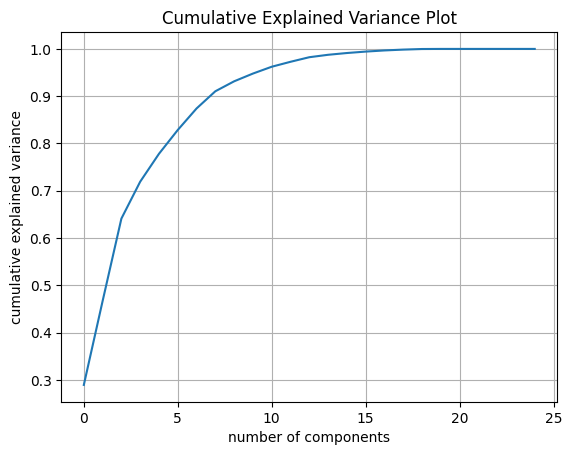

In [44]:
pca = PCA().fit(new_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(True)
plt.title("Cumulative Explained Variance Plot")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### Principal Component Analysis (PCA):

#  Patterns and Trends that Signal Human Trafficking

#### PCA with 2 Dimensions

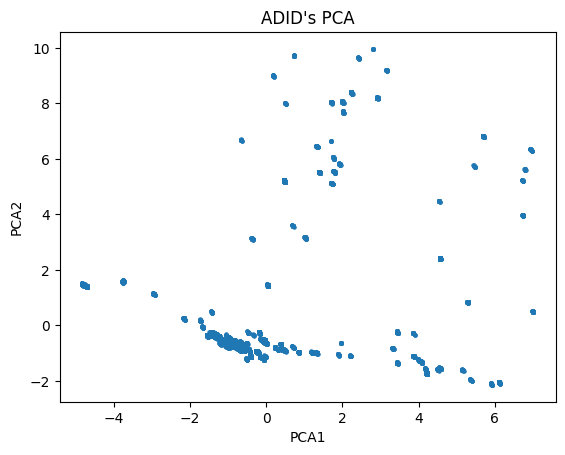

In [45]:
# PCA w/ 2 Dimensions
pca = PCA(n_components=2)
data_2d = pca.fit_transform(new_df)

#Separate Labeled Data
plot = plt.scatter(data_2d[:,0], data_2d[:,1], 5)
plt.title("ADID's PCA")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

#### PCA with 10 Dimensions

In [46]:
pca = PCA(n_components = 10)
X_principal = pca.fit_transform(new_df)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10']
print(X_principal.head())

         P1        P2        P3        P4        P5        P6        P7  \
0  3.422775 -0.220471  2.848417  7.584734  1.495983 -0.392621 -0.138248   
1  3.422775 -0.220472  2.848418  7.584725  1.495987 -0.392611 -0.138265   
2  3.422781 -0.220481  2.848437  7.584579  1.496046 -0.392459 -0.138543   
3  3.422789 -0.220494  2.848465  7.584361  1.496134 -0.392230 -0.138959   
4  3.422792 -0.220500  2.848478  7.584261  1.496175 -0.392125 -0.139150   

         P8        P9       P10  
0  1.206415  0.162252 -1.981084  
1  1.206431  0.162251 -1.981081  
2  1.206686  0.162239 -1.981019  
3  1.207068  0.162221 -1.980926  
4  1.207243  0.162213 -1.980884  


### Elbow Point Using Nearest Neighbors

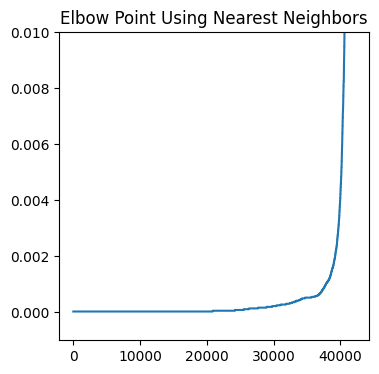

In [47]:
nn = NearestNeighbors(n_neighbors=200).fit(X_principal)
distances, indices = nn.kneighbors(X_principal)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(4,4))
plt.ylim(-0.001, 0.01)
plt.title("Elbow Point Using Nearest Neighbors")
# plt.xlabel("PCA1")
# plt.ylabel("PCA2")
plt.plot(distances)

### Density-based spatial clustering of applications with noise (DBSCAN)

In [48]:
db = DBSCAN(eps=1.2, min_samples=10).fit(X_principal)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 82
Estimated number of noise points: 13


### Evaluation Metrics

In [49]:
sc = metrics.silhouette_score(X_principal, labels)
print("Silhouette Coefficient:%0.2f" % sc)

Silhouette Coefficient:0.48


### DBSCAN Visualization - 2 Dimensions

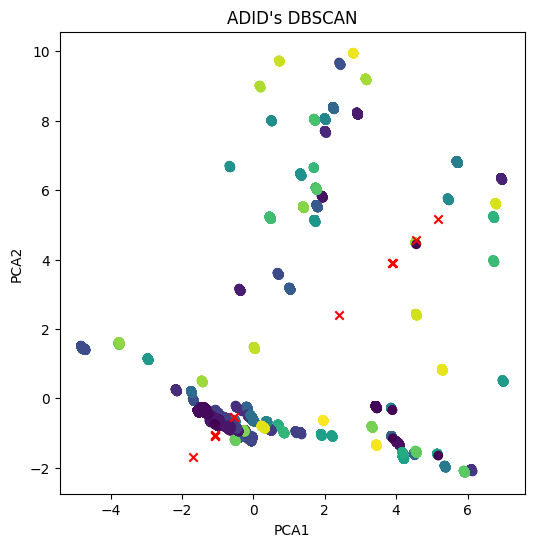

In [52]:
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c = labels)

outliers = X_principal[labels == -1]
plt.scatter(outliers.iloc[:,0], outliers.iloc[:,0], c="red", marker="x")

plt.title("ADID's DBSCAN")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

### Anomalies

In [51]:
X_principal[labels == -1]

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
8980,-1.697455,-0.016633,-1.089089,2.832118,2.228166,-1.288576,0.754537,0.134656,0.226702,-0.498278
9174,2.403762,9.676054,-2.412196,-0.944341,-1.004623,-1.833079,1.532885,0.111711,1.035908,-0.175186
12470,3.903569,-1.151657,2.113006,1.095769,-0.856300,1.304271,-1.574056,0.985027,-1.229109,-0.461393
17290,3.894658,-0.339955,2.738462,6.238611,5.068836,-0.485584,-2.100697,3.397337,-0.720756,-1.829215
17291,3.895481,-0.341326,2.741361,6.216031,5.077993,-0.461882,-2.143842,3.436895,-0.722629,-1.819625
24600,5.180423,-1.650478,2.723791,1.746589,0.075796,0.571866,-0.995615,1.956583,0.656711,-1.015993
24698,-0.549116,-0.941627,-0.847159,-2.241309,-1.019520,1.029626,-1.048075,0.105492,-0.650340,0.483524
24699,-0.549116,-0.941628,-0.847158,-2.241318,-1.019516,1.029636,-1.048093,0.105508,-0.650341,0.483528
33892,4.565048,4.438297,1.191315,2.439889,0.112341,0.018074,-1.549385,2.183904,0.595224,1.172650
42224,-1.081755,-0.744413,-1.036185,0.395002,0.814139,-0.545615,0.214124,1.421135,1.605366,0.699031
